# Exercice 2

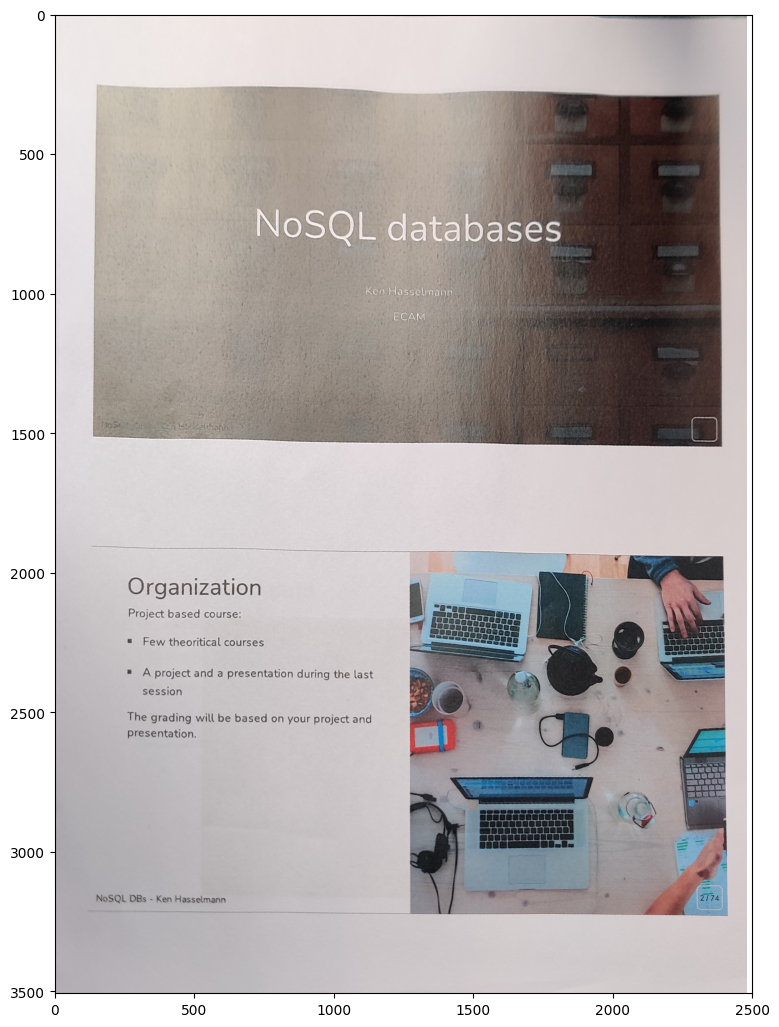

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('feuille.jpg')

factor = 1
plt.figure(figsize=(9*factor, 16*factor))  # taille de l'image en pouces
plt.axis([0, 2500, 3508, 0])

xw = np.array([0, 2480, 2480, 0]) #coordonnées mondes
yw = np.array([0, 0, 3508, 3508])

xi = np.array([1205.303571428572, 1146.8620129870137, 3421.212662337663, 3645.238636363637]) #Coordonnées images
yi = np.array([2399.905849109997, 821.9837711879186, 2.82794189453125, 2818.7370179411655])

D = [
    [xw[0], yw[0], 1, 0, 0, 0, -xi[0]*xw[0], -xi[0]*yw[0]],
    [0, 0, 0, xw[0], yw[0], 1, -yi[0]*xw[0], -yi[0]*yw[0]],
    [xw[1], yw[1], 1, 0, 0, 0, -xi[1]*xw[1], -xi[1]*yw[1]],
    [0, 0, 0, xw[1], yw[1], 1, -yi[1]*xw[1], -yi[1]*yw[1]],
    [xw[2], yw[2], 1, 0, 0, 0, -xi[2]*xw[2], -xi[2]*yw[2]],
    [0, 0, 0, xw[2], yw[2], 1, -yi[2]*xw[2], -yi[2]*yw[2]],
    [xw[3], yw[3], 1, 0, 0, 0, -xi[3]*xw[3], -xi[3]*yw[3]],
    [0, 0, 0, xw[3], yw[3], 1, -yi[3]*xw[3], -yi[3]*yw[3]]
]
D = np.array(D)

I = [
    [xi[0]],
    [yi[0]],
    [xi[1]],
    [yi[1]],
    [xi[2]],
    [yi[2]],
    [xi[3]],
    [yi[3]]
]
I = np.array(I)

M = np.linalg.inv(D) @ I

N = [
    [M[0][0], M[1][0], M[2][0]],
    [M[3][0], M[4][0], M[5][0]],
    [M[6][0], M[7][0], 1]
]

N = np.array(N)

Result = []

for y in range(yw[2]):
    Result.append([])
    for x in range(xw[1]):
        
        E = np.array([[x], [y], [1]])
        FImg = N @ E
        ximg = FImg[0][0]/FImg[2][0]  
        yimg = FImg[1][0]/FImg[2][0]
        
        RGB = img[round(yimg)][round(ximg)]
        Result[-1].append(list(RGB))
        
plt.imshow(Result)

plt.savefig("bookredressed.png")



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Chargement de l'image à redresser
img = mpimg.imread('feuille.jpg')

# Configuration de l'affichage
factor = 1  # Facteur d'agrandissement de l'image
plt.figure(figsize=(9*factor, 16*factor))  # Taille de l'image en pouces
plt.axis([0, 2500, 3508, 0])  # Inversion de l'axe y pour correspondre à une image

# Coordonnées du plan monde (dimensions de l'objet dans le monde réel)
xw = np.array([0, 2480, 2480, 0])  # Coordonnées x des coins
yw = np.array([0, 0, 3508, 3508])  # Coordonnées y des coins

# Coordonnées dans l'image (les points correspondants dans l'image déformée)
xi = np.array([1205.303571428572, 1146.8620129870137, 3421.212662337663, 3645.238636363637])
yi = np.array([2399.905849109997, 821.9837711879186, 2.82794189453125, 2818.7370179411655])

# Construction de la matrice D pour le calcul de la transformation homographique
D = [
    [xw[0], yw[0], 1, 0, 0, 0, -xi[0]*xw[0], -xi[0]*yw[0]],
    [0, 0, 0, xw[0], yw[0], 1, -yi[0]*xw[0], -yi[0]*yw[0]],
    [xw[1], yw[1], 1, 0, 0, 0, -xi[1]*xw[1], -xi[1]*yw[1]],
    [0, 0, 0, xw[1], yw[1], 1, -yi[1]*xw[1], -yi[1]*yw[1]],
    [xw[2], yw[2], 1, 0, 0, 0, -xi[2]*xw[2], -xi[2]*yw[2]],
    [0, 0, 0, xw[2], yw[2], 1, -yi[2]*xw[2], -yi[2]*yw[2]],
    [xw[3], yw[3], 1, 0, 0, 0, -xi[3]*xw[3], -xi[3]*yw[3]],
    [0, 0, 0, xw[3], yw[3], 1, -yi[3]*xw[3], -yi[3]*yw[3]]
]
D = np.array(D)  # Conversion en tableau NumPy pour manipulation matricielle

# Construction de la matrice I (vecteur des coordonnées image)
I = np.array([
    [xi[0]],
    [yi[0]],
    [xi[1]],
    [yi[1]],
    [xi[2]],
    [yi[2]],
    [xi[3]],
    [yi[3]]
])

# Calcul de la matrice de transformation homographique (N)
M = np.linalg.inv(D) @ I  # Résolution de l'équation D*M = I pour M
N = np.array([
    [M[0][0], M[1][0], M[2][0]],  # Première ligne de la matrice N
    [M[3][0], M[4][0], M[5][0]],  # Deuxième ligne de la matrice N
    [M[6][0], M[7][0], 1]         # Troisième ligne (homogène)
])

# Liste pour stocker l'image redressée
Result = []

# Boucle pour calculer chaque pixel de l'image redressée
for y in range(yw[2]):  # Parcours de la hauteur de l'image redressée
    Result.append([])  # Initialisation d'une nouvelle ligne
    for x in range(xw[1]):  # Parcours de la largeur de l'image redressée
        
        # Coordonnées homogènes dans le plan monde
        E = np.array([[x], [y], [1]])
        
        # Transformation des coordonnées monde -> image
        FImg = N @ E
        
        # Conversion des coordonnées homogènes en coordonnées cartésiennes
        ximg = FImg[0][0] / FImg[2][0]  
        yimg = FImg[1][0] / FImg[2][0]
        
        # Récupération des valeurs RGB de l'image originale
        RGB = img[round(yimg)][round(ximg)]
        Result[-1].append(list(RGB))  # Ajout des couleurs dans la ligne actuelle

# Affichage de l'image redressée
plt.imshow(Result)
plt.savefig("bookredressed.png")  # Sauvegarde de l'image redressée
